In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import izip, cycle

import seaborn as sns

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('./data/Train_Fyxd0t8.csv', index_col='ID')
test = pd.read_csv('./data/Test_C1XBIYq.csv', index_col='ID')

In [5]:
# http://stackoverflow.com/questions/21925114/is-there-an-implementation-of-missingmaps-in-pythons-ecosystem

def missmap(df, ax=None, colors=None, aspect=4, sort='descending',
            title=None, **kwargs):
    """
    Plot the missing values of df.

    Parameters
    ----------
    df : pandas DataFrame
    ax : matplotlib axes
        if None then a new figure and axes will be created
    colors : dict
        dict with {True: c1, False: c2} where the values are
        matplotlib colors.
    aspect : int
        the width to height ratio for each rectangle.
    sort : one of {'descending', 'ascending', None}
    title : str
    kwargs : dict
        matplotlib.axes.bar kwargs

    Returns
    -------
    ax : matplotlib axes

    """
    if ax is None:
        fig, ax = plt.subplots()

    # setup the axes
    dfn = pd.isnull(df)

    if sort in ('ascending', 'descending'):
        counts = dfn.sum()
        sort_dict = {'ascending': True, 'descending': False}
        counts.sort_values(ascending=sort_dict[sort], inplace=True)
        dfn = dfn[counts.index]

    ny = len(df)
    nx = len(df.columns)
    # each column is a stacked bar made up of ny patches.
    xgrid = np.tile(np.arange(len(df.columns)), (ny, 1)).T
    ygrid = np.tile(np.arange(ny), (nx, 1))
    # xys is the lower left corner of each patch
    xys = (zip(x, y) for x, y in izip(xgrid, ygrid))

    if colors is None:
        colors = {True: '#EAF205', False: 'k'}

    widths = cycle([aspect])
    heights = cycle([1])

    for xy, width, height, col in izip(xys, widths, heights, dfn.columns):
        color_array = dfn[col].map(colors)

        rects = [Rectangle(xyc, width, height, **kwargs)
                 for xyc, c in zip(xy, color_array)]

        p_coll = collections.PatchCollection(rects, color=color_array,
                                             edgecolor=color_array, **kwargs)
        ax.add_collection(p_coll, autolim=False)

    # post plot aesthetics
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

    ax.set_xticks(.5 + np.arange(nx))  # center the ticks
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)

    # remove tick lines
    ax.tick_params(axis='both', which='both', bottom='off', left='off',
                   labelleft='off')
    ax.grid(False)

    if title:
        ax.set_title(title)
    return ax

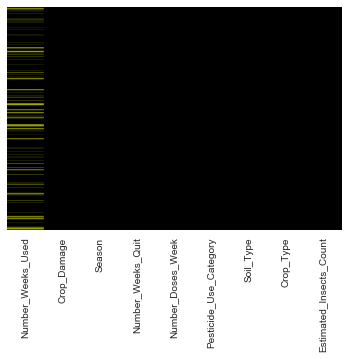

In [9]:
ax = missmap(train[:1000]);

### As you can see number of weeks used feature has lot of missing values

In [19]:
print '%f percent missing values for feature number of weeks used ' %(train.Number_Weeks_Used.isnull().sum() * 1. / len(train) * 100)

10.128520 percent missing values for feature number of weeks used 


## Histograms of features to get a sense of distribution of those features

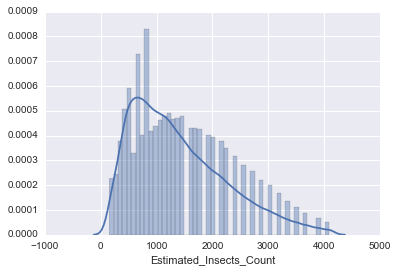

In [20]:
# Estimated Insects Count
sns.distplot(train.Estimated_Insects_Count);

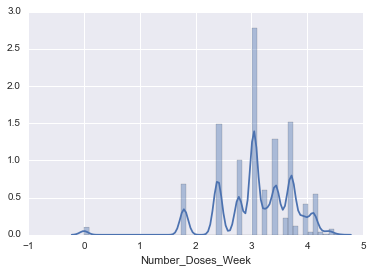

In [42]:
# Number of doses per week
sns.distplot(np.log1p(train.Number_Doses_Week));

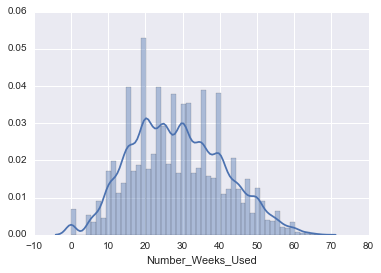

In [23]:
# Number of weeks used
sns.distplot(train[train.Number_Weeks_Used.notnull()].Number_Weeks_Used);

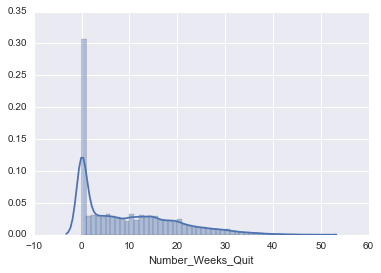

In [24]:
# Number of weeks quit
sns.distplot(train.Number_Weeks_Quit);

In [25]:
# mosaic plots
from statsmodels.graphics.mosaicplot import mosaic

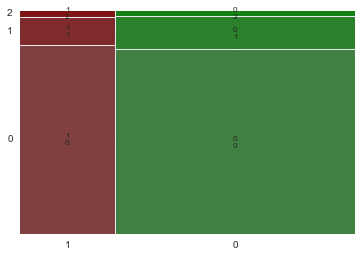

In [26]:
mosaic(train, ['Crop_Type', 'Crop_Damage']);

** Width of the rectangles determines the number of examples for that particular type. **

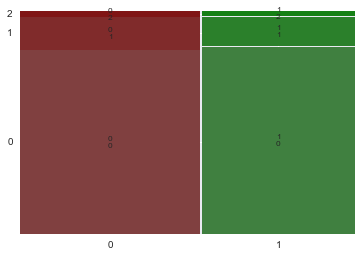

In [27]:
mosaic(train, ['Soil_Type', 'Crop_Damage']);

** Soil Type - 1 has a slightly higher chance of staying alive **

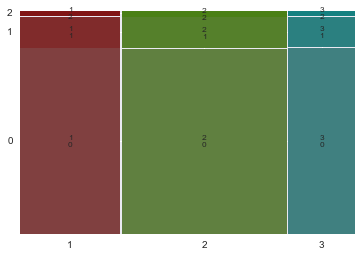

In [28]:
mosaic(train, ['Season', 'Crop_Damage']);

** Season does not seem have to much of an impact on the outcome **

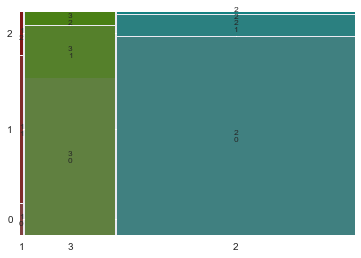

In [29]:
mosaic(train, ['Pesticide_Use_Category', 'Crop_Damage']);

** So of you have never used pesticide, harvest has a low chance of survival, and if you are currently using pesticides then there are considerable chances of damage due to these pesticides. **

## Boxplots

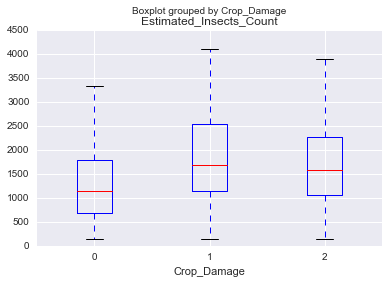

In [31]:
train.boxplot(column='Estimated_Insects_Count', by='Crop_Damage');

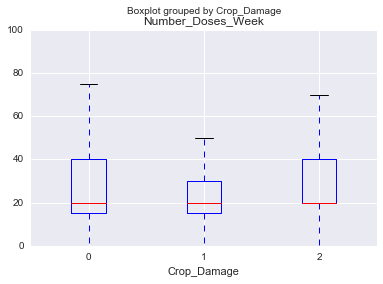

In [33]:
train.boxplot(column='Number_Doses_Week', by='Crop_Damage');

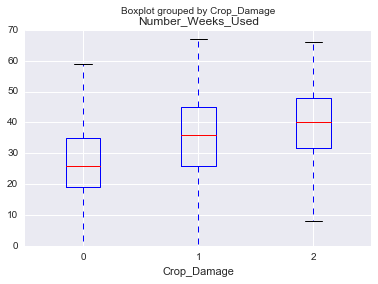

In [34]:
train[train.Number_Weeks_Used.notnull()].boxplot(column='Number_Weeks_Used', by='Crop_Damage');

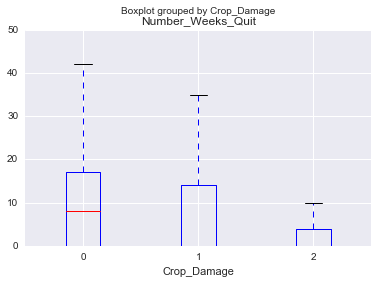

In [35]:
train.boxplot(column='Number_Weeks_Quit', by='Crop_Damage');

In [36]:
## Crop Damage vs missing values in Num_Weeks_Used
train = train.fillna(-1)

In [41]:
pd.crosstab(train[train.Number_Weeks_Used==-1].Number_Weeks_Used, train[train.Number_Weeks_Used==-1].Crop_Damage, margins=True)

Crop_Damage,0,1,2,All
Number_Weeks_Used,,,,
-1.0,7495,1248,257,9000
All,7495,1248,257,9000


### Analyze how 